![](images/CustomerChrun.png)

## Business Understaning
**Customer churn** , also known as customer attrition, is when customer chooses to stop using the  products or services of the company and stops the relationship.
<P>
**Objective:**
    The primary objective is to identify the factors that contribute to customer churn and make a predictive model that can forecast if the customers are likely to leave


## Data Understaning
The dataset used is Telecom churn datasets (customer_churn_dataset-training-master.csv and customer_churn_dataset-testing-master.csv) from <a href="https://www.kaggle.com/datasets/">Kaggle</a>
<p>The datasets together contains about 500K rows and 12 feature columns including target feature:<br></P>
<P><b>Input Variables:<b></P>
<ul>
    <li><b>CustomerID:</b> Unique identifier for a customer</li>
    <li><b>Age:</b> Age of the customer</li>
    <li><b>Gender:</b> Gender of the customer</li>
    <li><b>Tenure:</b> Duration in months for which a customer has been using the company's products/services</li>
    <li><b>Usage Frequency:</b> Number of times the customer has used the company’s services in the last month</li>
    <li><b>Support Calls:</b> Number of calls the customer has made to the customer support in the last month</li>
    <li><b>Payment Delay:</b> Number of days the customer has delayed their payment in the last month</li>
    <li><b>Subscription Type:</b> Type of subscription choosen by the customer</li>
    <li><b>Contract Length:</b> Contract duration that the customer has signed with the company</li>
    <li><b>Total Spend:</b> Total amount the customer has spent on the company's products or services</li>
    <li><b>Last Interaction:</b> Number of days since the customer had the last interaction with the company</li>
</ul>
<P><b>Output Variable:<b></P>
<ul>
    <li><b>Churn:</b> Binary label indicating whether a customer has churned (1) or not (0) </li> <br>
</ul>


### Import Module Libraries

In [52]:
import pandas as pd
import numpy as np
from scipy import stats
import time

# data vizualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,4)
plt.style.use("fivethirtyeight")

# pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# validation
from sklearn.model_selection import train_test_split

# model
from sklearn.dummy import DummyClassifier

import warnings
warnings.filterwarnings("ignore")

print("All modules loaded")

All modules loaded


### Import Data

In [53]:
# There were two datasets already split into Training and Tesing. I am merging them into one and will split later randomly during processing

df = pd.concat(
    [
        pd.read_csv('data/customer_churn_dataset-training-master.csv'),
        pd.read_csv('data/customer_churn_dataset-testing-master.csv')
    ], axis=0)
df.reset_index(drop=True, inplace=True)
df_orig = df.copy()
df.shape

(505207, 12)

In [54]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.00,30.00,Female,39.00,14.00,5.00,18.00,Standard,Annual,932.00,17.00,1.00
1,3.00,65.00,Female,49.00,1.00,10.00,8.00,Basic,Monthly,557.00,6.00,1.00
2,4.00,55.00,Female,14.00,4.00,6.00,18.00,Basic,Quarterly,185.00,3.00,1.00
3,5.00,58.00,Male,38.00,21.00,7.00,7.00,Standard,Monthly,396.00,29.00,1.00
4,6.00,23.00,Male,32.00,20.00,5.00,8.00,Basic,Monthly,617.00,20.00,1.00


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


### Data Cleaning

**Clean the column names if required**

In [56]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [57]:
# replace space with _ and make all lower case

df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.columns

Index(['customerid', 'age', 'gender', 'tenure', 'usage_frequency',
       'support_calls', 'payment_delay', 'subscription_type',
       'contract_length', 'total_spend', 'last_interaction', 'churn'],
      dtype='object')

**Missing Value Check**

In [58]:
df.isnull().sum()

,0
customerid,1
age,1
gender,1
tenure,1
usage_frequency,1
support_calls,1
payment_delay,1
subscription_type,1
contract_length,1
total_spend,1


In [59]:
# Removing the missing row as there is only a single row
df.dropna(inplace=True)

**Duplicate Check**

In [60]:
sum(df.duplicated())

0

**Drop unwanted columns**

In [61]:
# CustomerID has no impact on the analysis and can be dropped
df.drop(columns=['customerid'], inplace = True)
df

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,30.00,Female,39.00,14.00,5.00,18.00,Standard,Annual,932.00,17.00,1.00
1,65.00,Female,49.00,1.00,10.00,8.00,Basic,Monthly,557.00,6.00,1.00
2,55.00,Female,14.00,4.00,6.00,18.00,Basic,Quarterly,185.00,3.00,1.00
3,58.00,Male,38.00,21.00,7.00,7.00,Standard,Monthly,396.00,29.00,1.00
4,23.00,Male,32.00,20.00,5.00,8.00,Basic,Monthly,617.00,20.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...
505202,45.00,Female,33.00,12.00,6.00,21.00,Basic,Quarterly,947.00,14.00,1.00
505203,37.00,Male,6.00,1.00,5.00,22.00,Standard,Annual,923.00,9.00,1.00
505204,25.00,Male,39.00,14.00,8.00,30.00,Premium,Monthly,327.00,20.00,1.00
505205,50.00,Female,18.00,19.00,7.00,22.00,Standard,Monthly,540.00,13.00,1.00


In [62]:
# It would be good to convert few datatype to integer as they are discrete and will be good in chart display

discrete_cols = ['age', 'tenure', 'usage_frequency', 'support_calls', 'payment_delay', 'last_interaction', 'churn']
for col in discrete_cols:
    df[col] = df[col].astype(int)
df


,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,30,Female,39,14,5,18,Standard,Annual,932.00,17,1
1,65,Female,49,1,10,8,Basic,Monthly,557.00,6,1
2,55,Female,14,4,6,18,Basic,Quarterly,185.00,3,1
3,58,Male,38,21,7,7,Standard,Monthly,396.00,29,1
4,23,Male,32,20,5,8,Basic,Monthly,617.00,20,1
...,...,...,...,...,...,...,...,...,...,...,...
505202,45,Female,33,12,6,21,Basic,Quarterly,947.00,14,1
505203,37,Male,6,1,5,22,Standard,Annual,923.00,9,1
505204,25,Male,39,14,8,30,Premium,Monthly,327.00,20,1
505205,50,Female,18,19,7,22,Standard,Monthly,540.00,13,1


## Exploratory Data Analysis (EDA)

In [63]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [64]:
df.describe()

,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction,churn
count,505206.00,505206.00,505206.00,505206.00,505206.00,505206.00,505206.00,505206.00
mean,39.70,31.35,15.71,3.83,13.50,620.07,14.61,0.56
std,12.67,17.24,8.62,3.13,8.45,245.32,8.61,0.50
min,18.00,1.00,1.00,0.00,0.00,100.00,1.00,0.00
25%,29.00,16.00,8.00,1.00,6.00,446.00,7.00,0.00
50%,40.00,32.00,16.00,3.00,13.00,648.90,14.00,1.00
75%,49.00,46.00,23.00,6.00,20.00,824.00,22.00,1.00
max,65.00,60.00,30.00,10.00,30.00,1000.00,30.00,1.00


In [65]:
df.describe(include=['object', 'category'])

,gender,subscription_type,contract_length
count,505206,505206,505206
unique,2,3,3
top,Male,Standard,Annual
freq,280273,170630,198608


In [66]:
df['churn'].value_counts()

,count
churn,
1,280492
0,224714


In [67]:
df['gender'].value_counts()

,count
gender,
Male,280273
Female,224933


In [68]:
df_analysis=df.convert_dtypes()
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505206 entries, 0 to 505206
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                505206 non-null  Int64  
 1   gender             505206 non-null  string 
 2   tenure             505206 non-null  Int64  
 3   usage_frequency    505206 non-null  Int64  
 4   support_calls      505206 non-null  Int64  
 5   payment_delay      505206 non-null  Int64  
 6   subscription_type  505206 non-null  string 
 7   contract_length    505206 non-null  string 
 8   total_spend        505206 non-null  Float64
 9   last_interaction   505206 non-null  Int64  
 10  churn              505206 non-null  Int64  
dtypes: Float64(1), Int64(7), string(3)
memory usage: 50.1 MB


In [69]:
df_analysis.shape

(505206, 11)

In [70]:
df['total_spend'].describe()

,total_spend
count,505206.00
mean,620.07
std,245.32
min,100.00
25%,446.00
50%,648.90
75%,824.00
max,1000.00


In [71]:
df.shape

(505206, 11)

### Outlier Treatment

In [72]:
iqr = df['total_spend'].quantile(.75) - df['total_spend'].quantile(.25)
iqr

378.0

In [73]:
lower_bound = df['total_spend'].quantile(.25) - 1.5 * iqr
upper_bound = df['total_spend'].quantile(.75) + 1.5 * iqr
df_iqr = df[(df['total_spend'] > lower_bound) & (df['total_spend'] < upper_bound)].copy()

In [74]:
iqr_data_lost = 1-(df_iqr.shape[0]/df.shape[0])
print("We lost {:.2%} of the data by the IQR method".format(iqr_data_lost))

We lost 0.00% of the data by the IQR method


In [75]:
df_iqr.shape

(505206, 11)

In [76]:
df_iqr['total_spend'].describe()

,total_spend
count,505206.00
mean,620.07
std,245.32
min,100.00
25%,446.00
50%,648.90
75%,824.00
max,1000.00


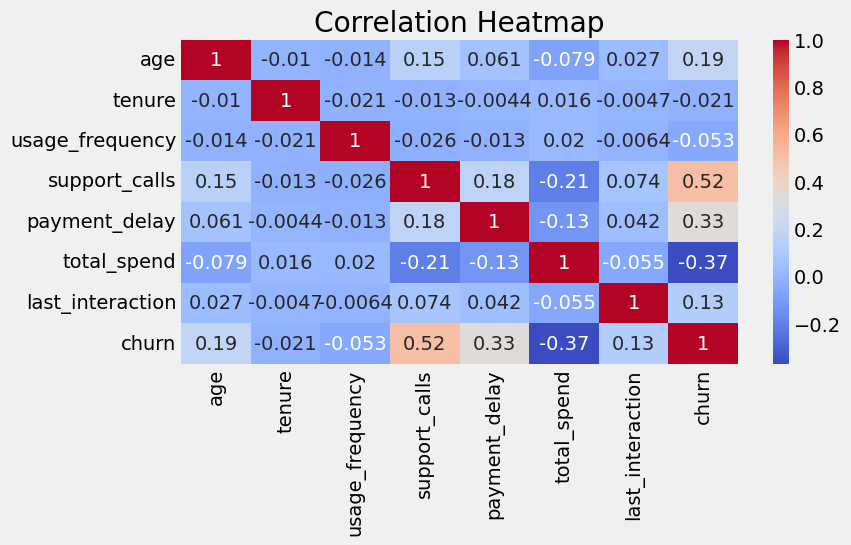

In [77]:
# Heatmap on numerical features

corr = df_iqr.corr(numeric_only = True)
plt.title('Correlation Heatmap')
sns.heatmap(corr, annot = True, cmap="coolwarm")
#plt.xticks(rotation=60)
plt.savefig("images/CorrelationHeatmap.png",bbox_inches = 'tight')
plt.show()

### Univarient Analysis

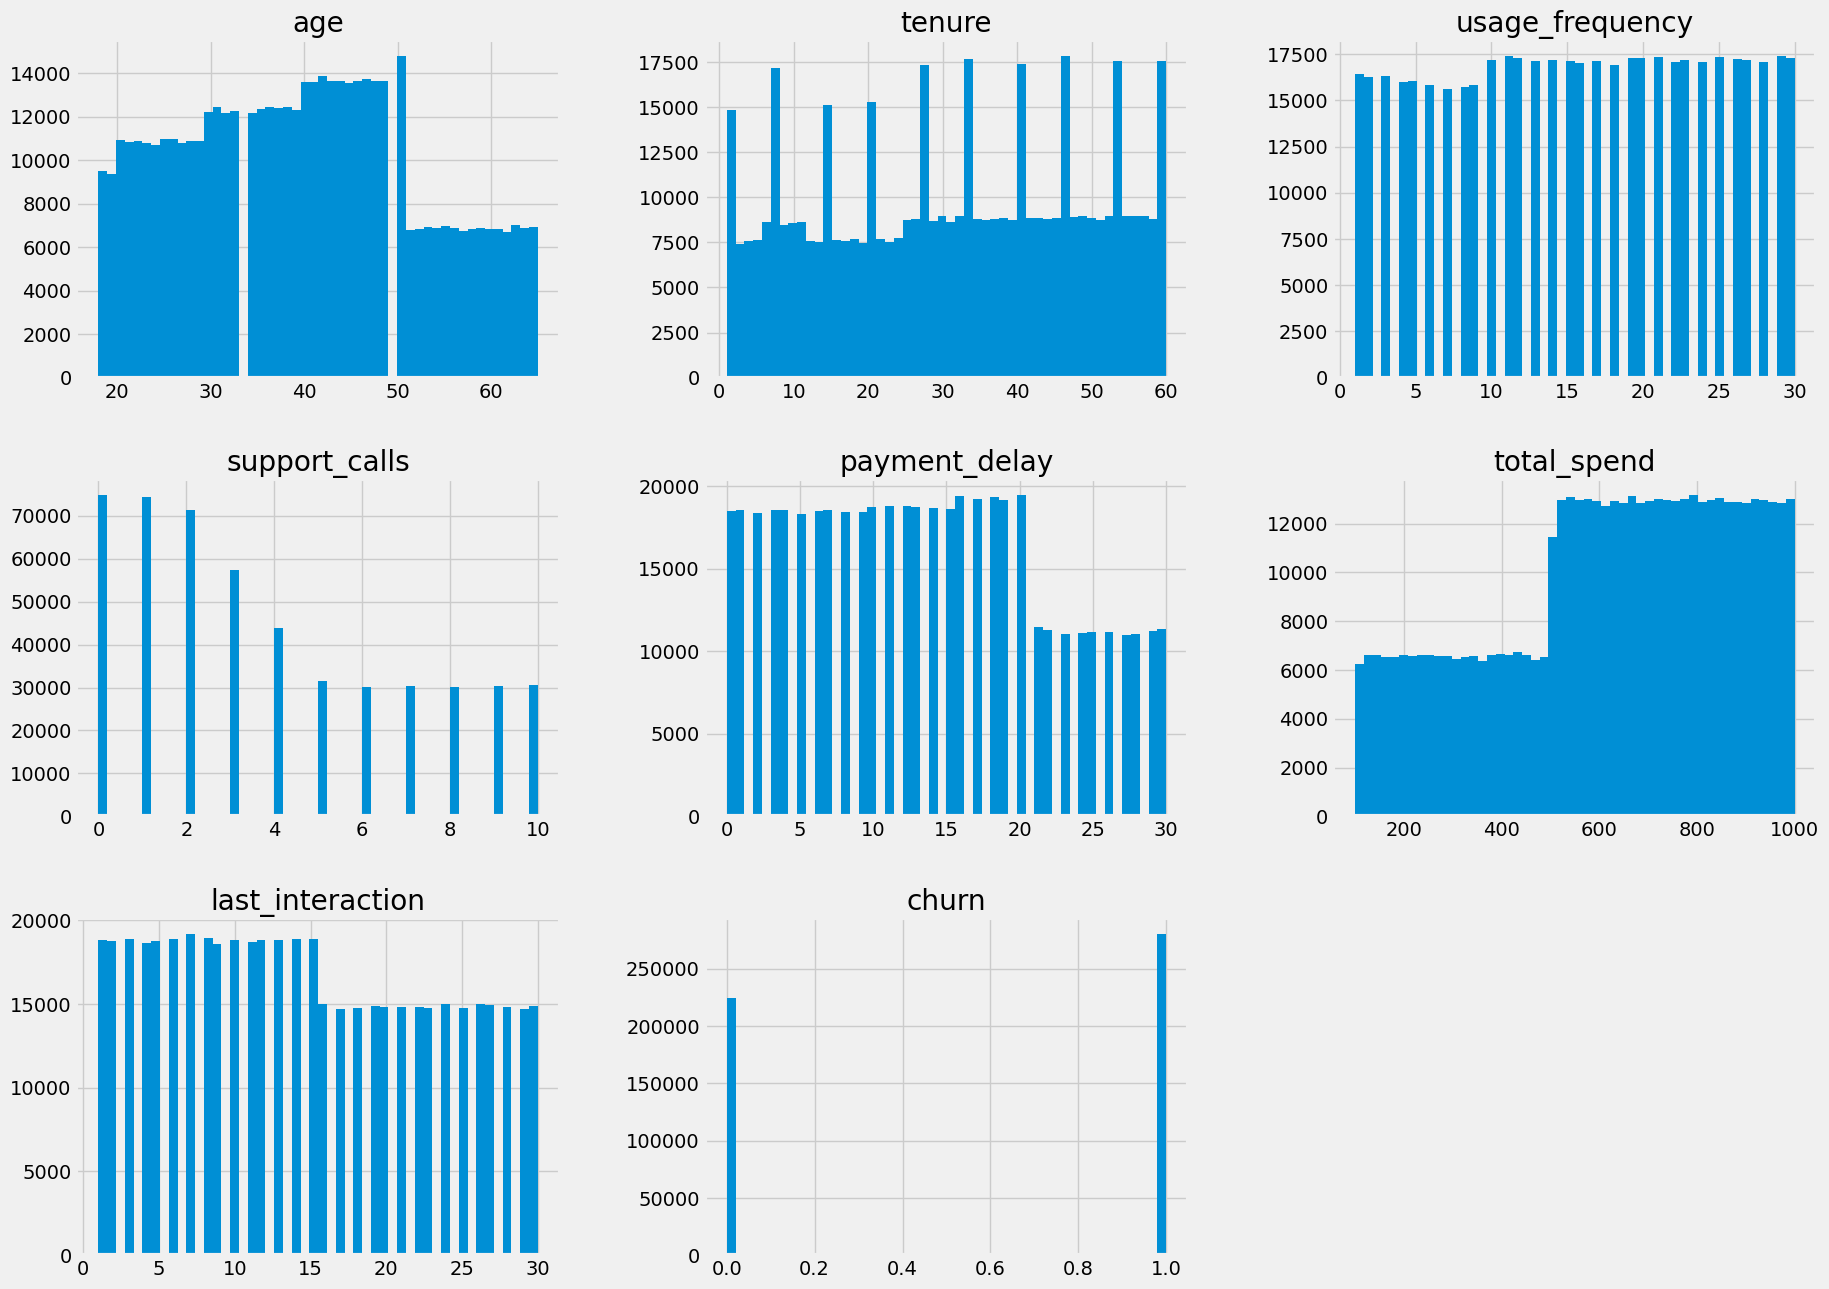

In [78]:
# Histogram for numerical variables
df.select_dtypes(include=np.number).hist(bins=50, figsize=(20,15))
plt.savefig("images/Histograms.png",bbox_inches = 'tight')
plt.show()

In [79]:
# sns.pairplot(df, hue='churn')
# plt.show()

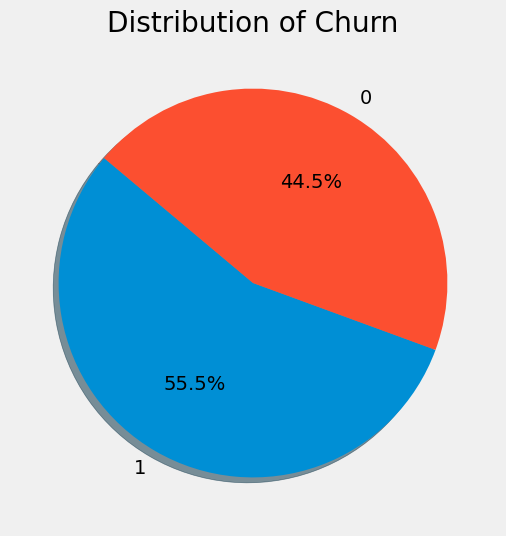

In [80]:
# Draw a pie chart
plt.figure(figsize=(6,6))
churn_count = df['churn'].value_counts()
plt.pie(churn_count, labels=churn_count.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Distribution of Churn')
plt.savefig("images/DistributionOfChurn.png",bbox_inches = 'tight')
plt.show()

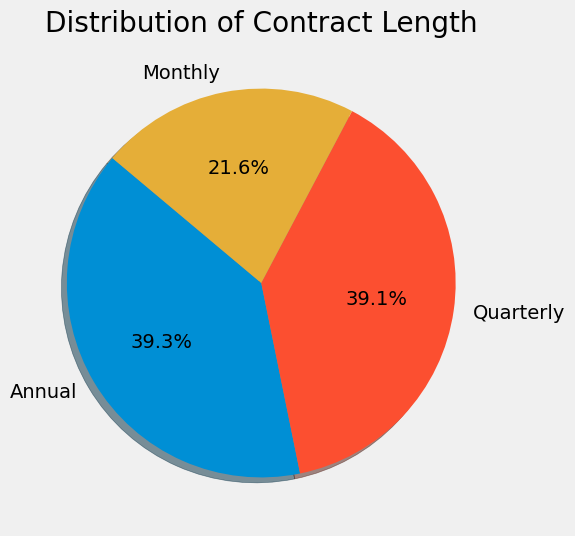

In [81]:
# Draw a pie chart
plt.figure(figsize=(6,6))
cl_count = df['contract_length'].value_counts()
plt.pie(cl_count, labels=cl_count.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Distribution of Contract Length')
plt.savefig("images/DistributionOfContractLength.png",bbox_inches = 'tight')
plt.show()

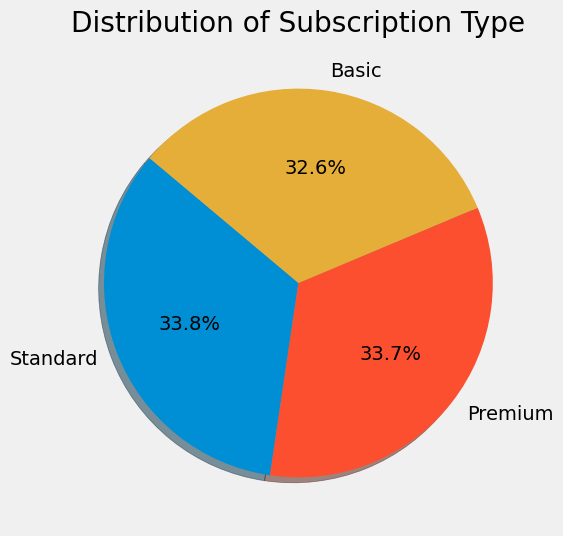

In [82]:
# Draw a pie chart
plt.figure(figsize=(6,6))
subType_count = df['subscription_type'].value_counts()
plt.pie(subType_count, labels=subType_count.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Distribution of Subscription Type')
plt.savefig("images/DistributionOfSubscriptionType.png",bbox_inches = 'tight')
plt.show()

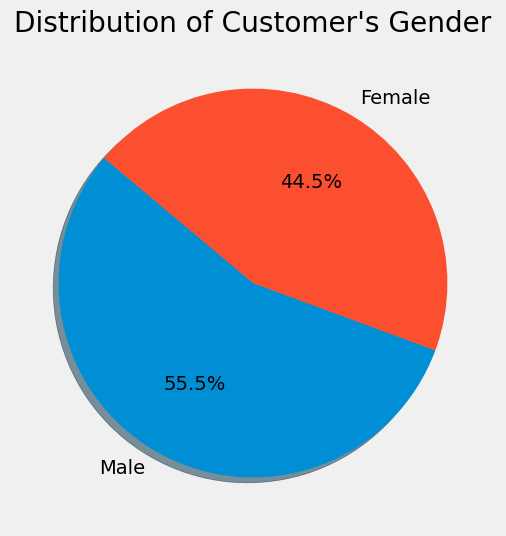

In [83]:
# Draw a pie chart
plt.figure(figsize=(6,6))
gender_count = df['gender'].value_counts()
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title(f"Distribution of Customer's Gender")
plt.savefig("images/DistributionOfGender.png",bbox_inches = 'tight')
plt.show()

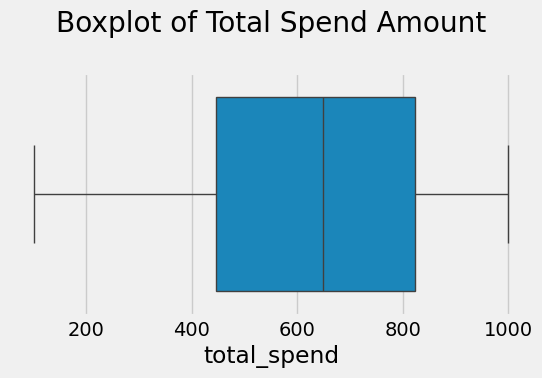

In [84]:
#df['total_spend'].plot(kind = 'box', vert = False, title = "Boxplot of Total Spend Amount");
plt.figure(figsize=(6,3))
sns.boxplot(df, x='total_spend')
plt.title(f"Boxplot of Total Spend Amount\n")
plt.xlabel('total_spend')
plt.savefig("images/TotalSpendAmountBoxplot.png",bbox_inches = 'tight')
plt.show()

### Bivarient Analysis

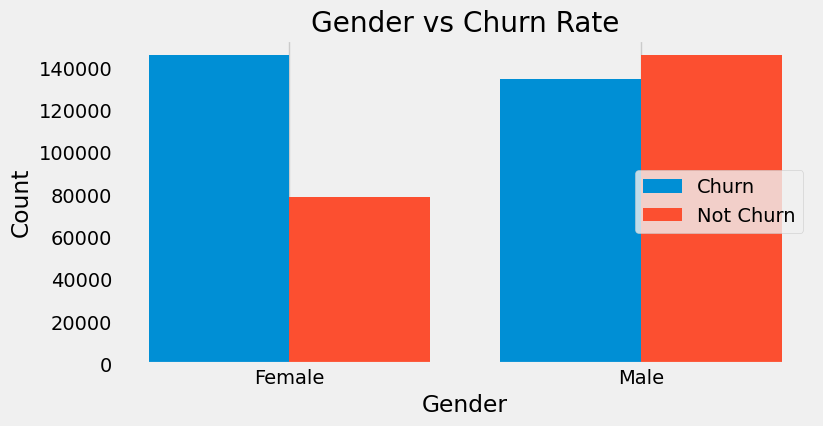

In [85]:
gender_churn = df.groupby(['gender', 'churn']).size().unstack()

X = list(gender_churn.index)
churn_0 = list(gender_churn.iloc[:, 0])
churn_1 = list(gender_churn.iloc[:, 1])
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')

plt.xticks(X_axis, X)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title("Gender vs Churn Rate")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.savefig("images/GenderVSChurn.png",bbox_inches = 'tight')
plt.show()

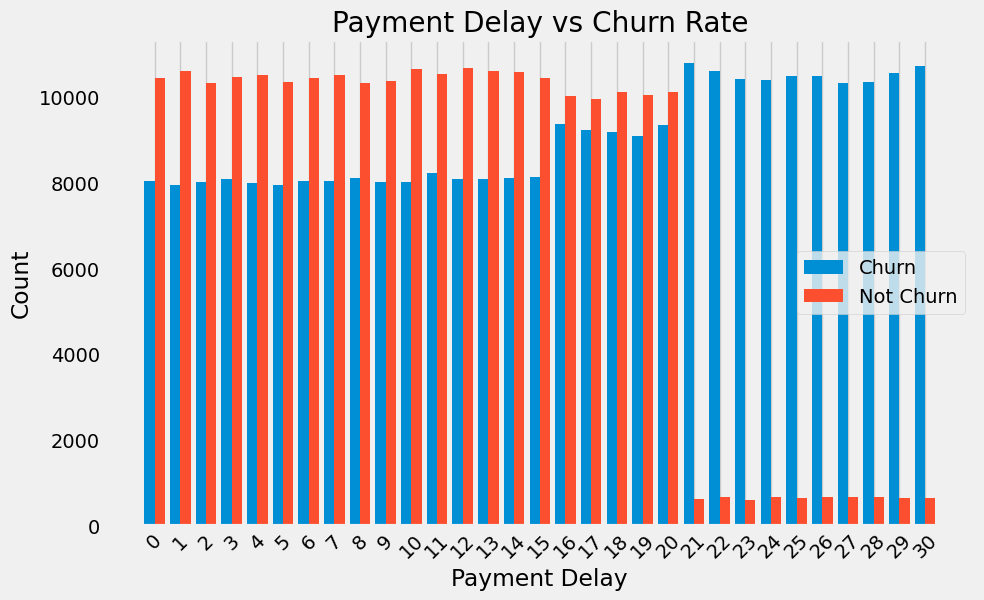

In [86]:
paydelay_churn = df.groupby(['payment_delay', 'churn']).size().unstack()

X = list(paydelay_churn.index)
churn_0 = list(paydelay_churn.iloc[:, 0])
churn_1 = list(paydelay_churn.iloc[:, 1])
X_axis = np.arange(len(X))
plt.figure(figsize=(10,6))
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')

plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Payment Delay')
plt.ylabel('Count')
plt.title("Payment Delay vs Churn Rate")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.savefig("images/PaymentDelayVSChurn.png",bbox_inches = 'tight')
plt.show()

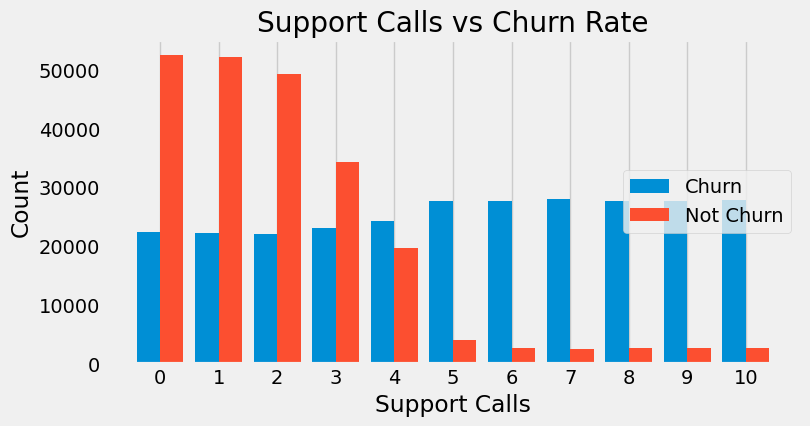

In [87]:
support_calls = df.groupby(['support_calls', 'churn']).size().unstack()

X = list(support_calls.index)
churn_0 = list(support_calls.iloc[:, 0])
churn_1 = list(support_calls.iloc[:, 1])
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')

plt.xticks(X_axis, X)
plt.xlabel('Support Calls')
plt.ylabel('Count')
plt.title("Support Calls vs Churn Rate")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.savefig("images/SupportCallsVSChrun.png",bbox_inches = 'tight')
plt.show()

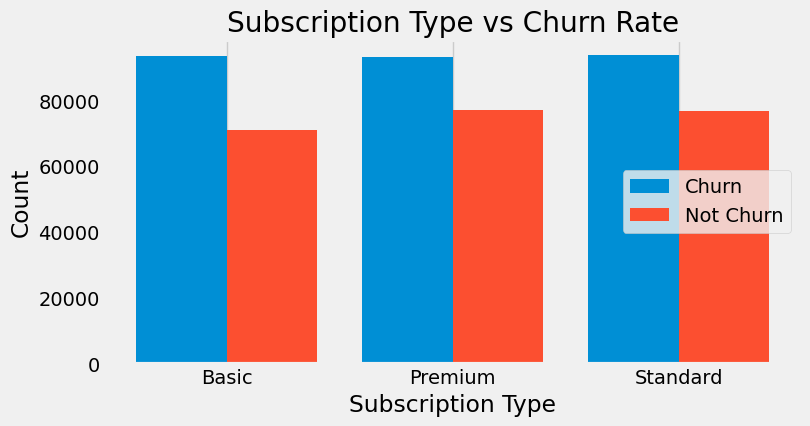

In [88]:
subscription_type = df.groupby(['subscription_type', 'churn']).size().unstack()

X = list(subscription_type.index)
churn_0 = list(subscription_type.iloc[:, 0])
churn_1 = list(subscription_type.iloc[:, 1])
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')

plt.xticks(X_axis, X)
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.title("Subscription Type vs Churn Rate")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.savefig("images/SubscriptionTypeVSChurn.png",bbox_inches = 'tight')
plt.show()

## Data Pre-processing

In [89]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

### Train-Test Split

In [90]:
# Define the features (X) and the target variable (y)
X = df.drop(columns=['churn'])  # Here we are removing the target column
y = df['churn']  # This is our target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
X_train.head()

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction
166878,48,Male,57,8,2,11,Basic,Annual,885.00,16
347477,33,Male,43,13,0,1,Basic,Quarterly,684.44,23
254093,37,Male,26,18,1,5,Basic,Quarterly,778.02,6
146324,27,Male,44,4,4,13,Standard,Monthly,502.00,8
300200,35,Male,56,2,0,1,Standard,Quarterly,603.26,27


In [92]:
# Check missing Value count

print(X_train.isna().sum())
print("========================")
print(X_test.isna().sum())

age                  0
gender               0
tenure               0
usage_frequency      0
support_calls        0
payment_delay        0
subscription_type    0
contract_length      0
total_spend          0
last_interaction     0
dtype: int64
age                  0
gender               0
tenure               0
usage_frequency      0
support_calls        0
payment_delay        0
subscription_type    0
contract_length      0
total_spend          0
last_interaction     0
dtype: int64


In [93]:
# Select numerical as well as categorical columns

numerical_cols = X_train.select_dtypes(include=['int','int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object','string']).columns.tolist()
print(numerical_cols)
print(categorical_cols)

['age', 'tenure', 'usage_frequency', 'support_calls', 'payment_delay', 'total_spend', 'last_interaction']
['gender', 'subscription_type', 'contract_length']


In [94]:
# Create a preprocessor that applies both imputation and scaling to numerical columns and one-hot encoding to categorical columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Imputation using the mean
            ('scaler', StandardScaler())  # Standardization of numerical columns
        ]), numerical_cols),  # Pipeline for numerical columns

        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encoding for categorical columns
    ])

In [95]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [96]:
# The names of the numerical columns remain unchanged after the transformation
numerical_col_names = numerical_cols

# The method get_feature_names_out generates the names of the new columns created by OneHotEncoder for the categorical columns
categorical_col_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Combine the names of numerical and categorical columns into a single list
all_column_names = list(categorical_col_names) + list(numerical_col_names)

# Convert the matrix into a DataFrame with the column names
X_train_scaled = pd.DataFrame(X_train_processed, columns=all_column_names)

X_train_scaled.head()

,gender_Female,gender_Male,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,contract_length_Annual,contract_length_Monthly,contract_length_Quarterly,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction
0,0.66,1.49,-0.89,-0.59,-0.30,1.08,0.16,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00
1,-0.53,0.68,-0.31,-1.22,-1.48,0.26,0.97,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00
2,-0.21,-0.31,0.27,-0.90,-1.01,0.64,-1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00
3,-1.00,0.73,-1.36,0.05,-0.06,-0.48,-0.77,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00
4,-0.37,1.43,-1.59,-1.22,-1.48,-0.07,1.44,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00


In [97]:
# Convert the matrix into a DataFrame with the column names

X_test_scaled = pd.DataFrame(X_test_processed, columns=all_column_names)
X_test_scaled.head()

,gender_Female,gender_Male,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,contract_length_Annual,contract_length_Monthly,contract_length_Quarterly,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction
0,1.13,-1.53,0.50,-0.90,-1.24,-0.81,0.04,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00
1,1.76,0.39,1.42,1.01,-0.65,-0.18,-0.42,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00
2,0.34,-0.89,0.61,-0.90,-0.30,0.70,-1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
3,-1.40,1.49,-0.43,-0.59,-0.77,-0.12,-0.88,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00
4,-1.24,-0.31,-1.59,0.05,1.12,0.78,-0.07,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00


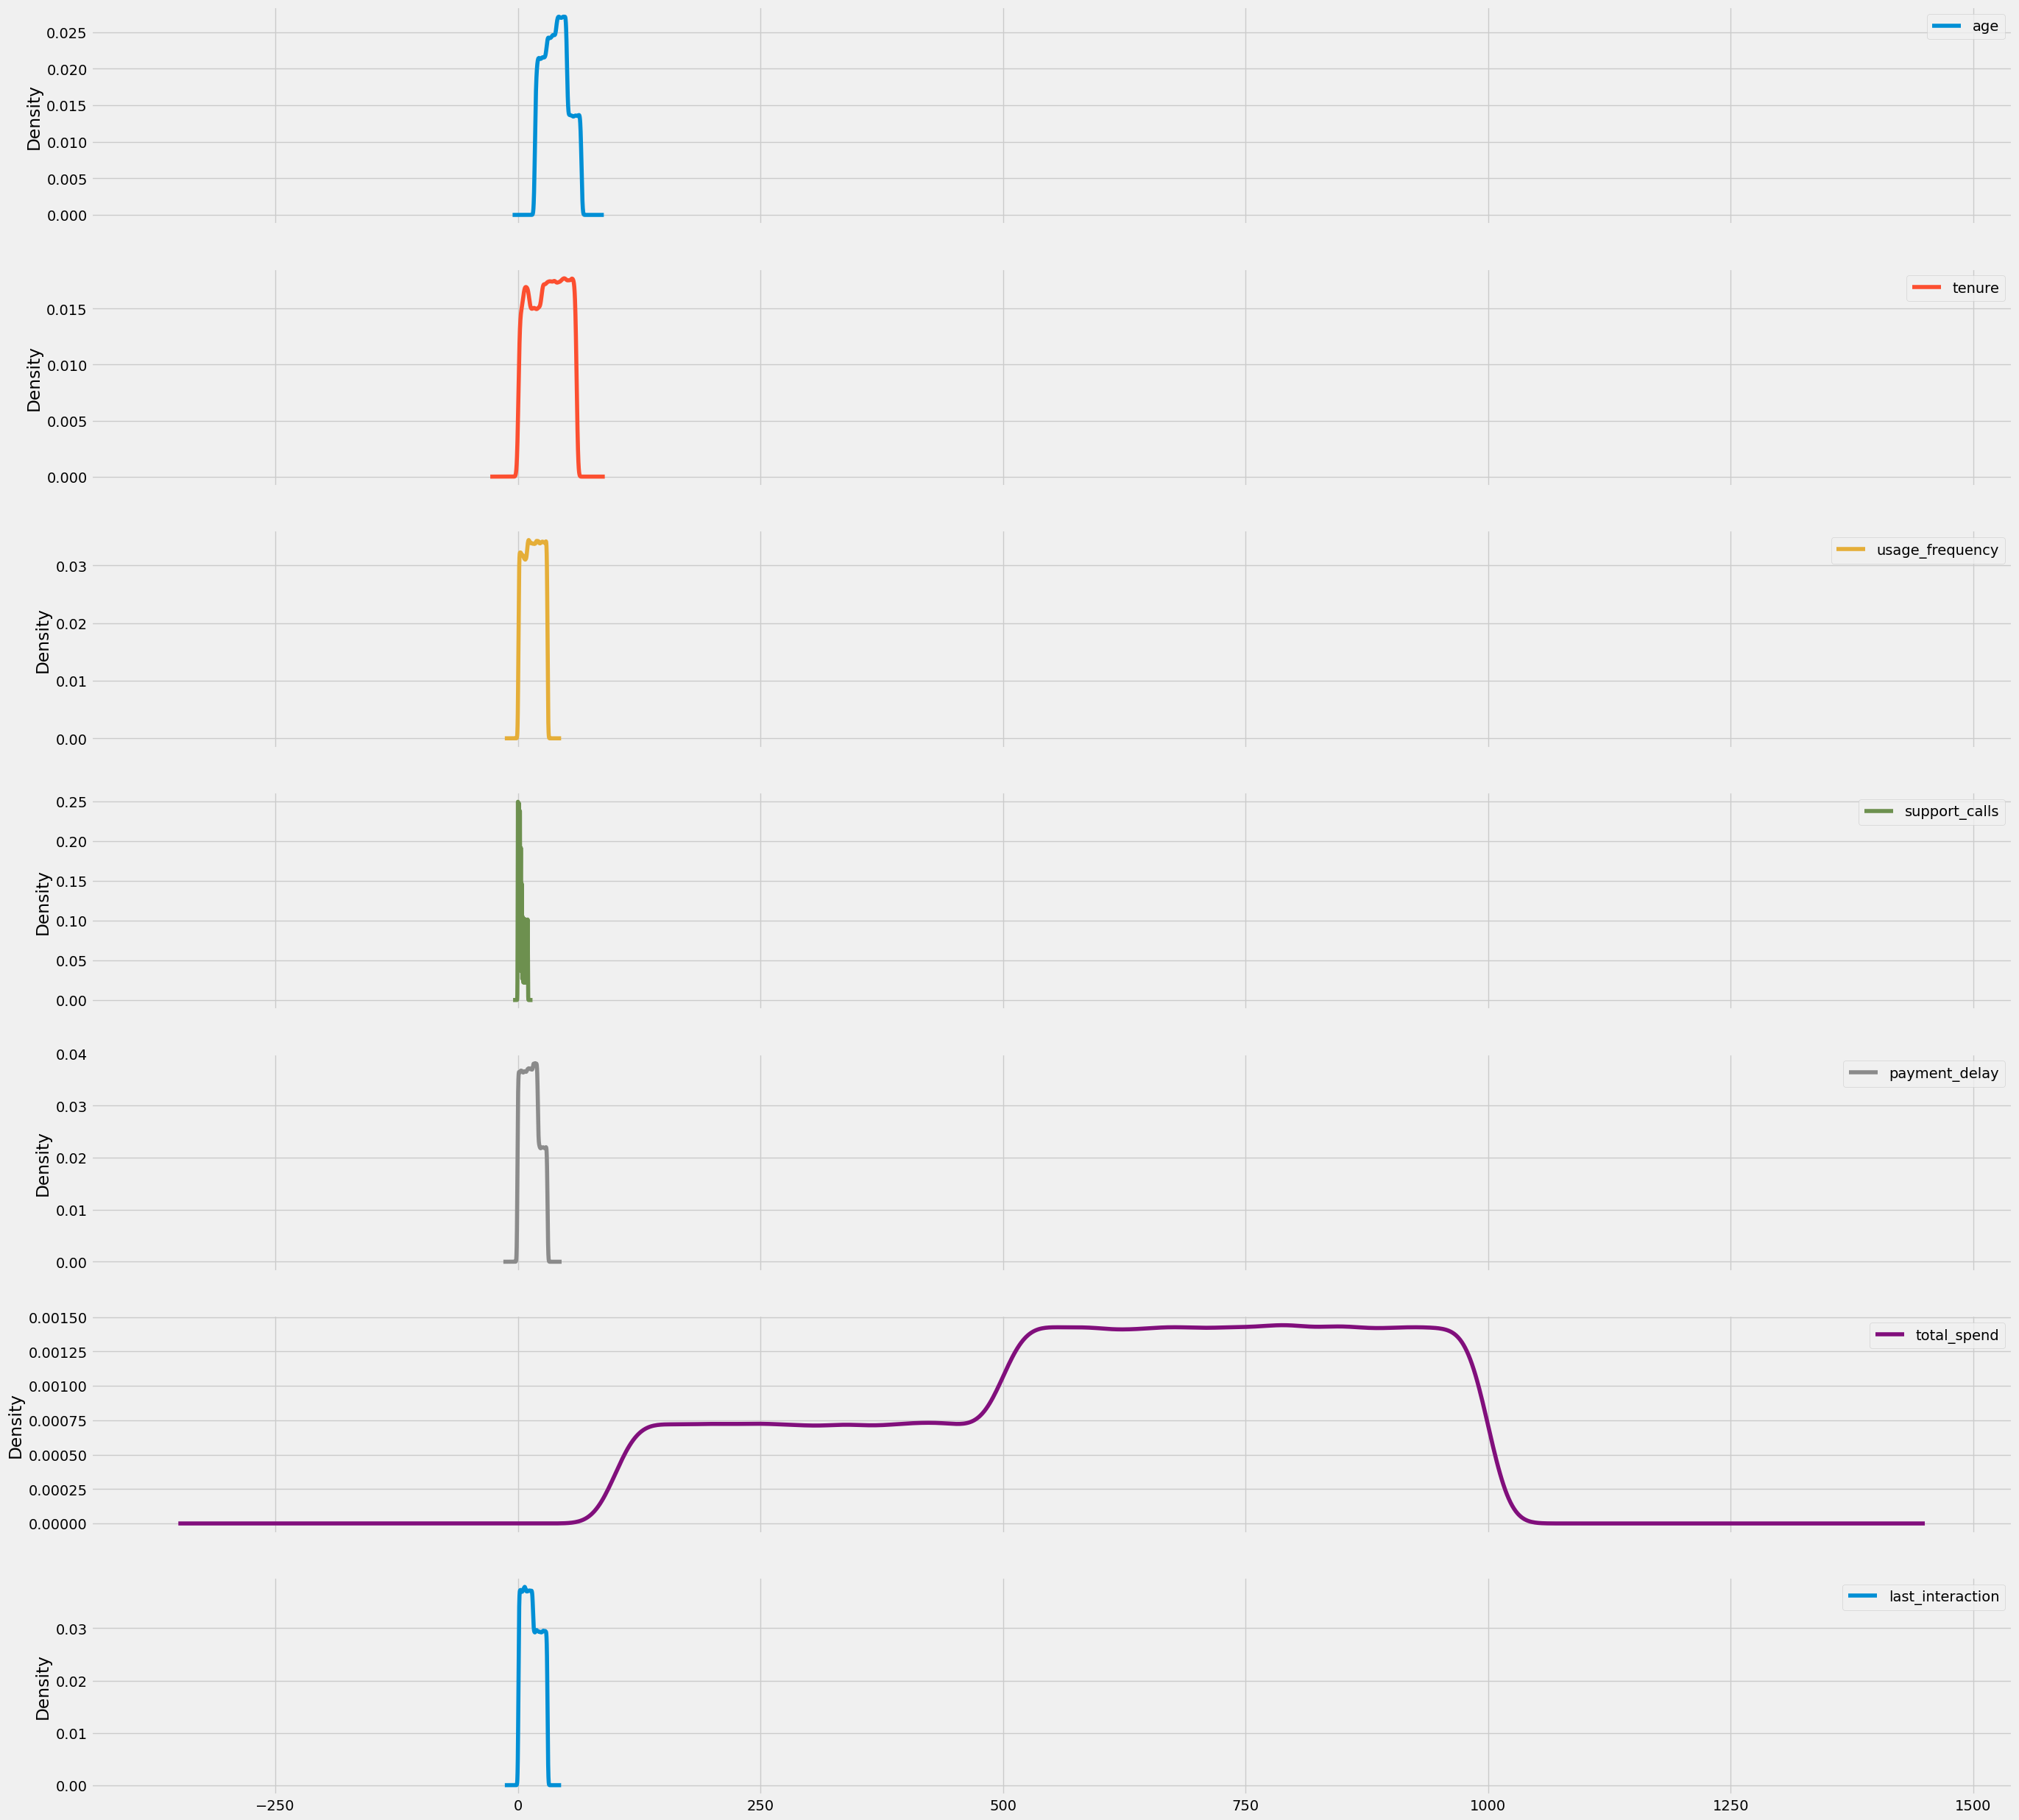

In [98]:
# KDE Plot to view the density (before scaling)

X_train.plot(kind = 'kde', subplots = True, figsize = (30, 30));
plt.savefig("images/KDE_X_train.png",bbox_inches = 'tight')
plt.show()

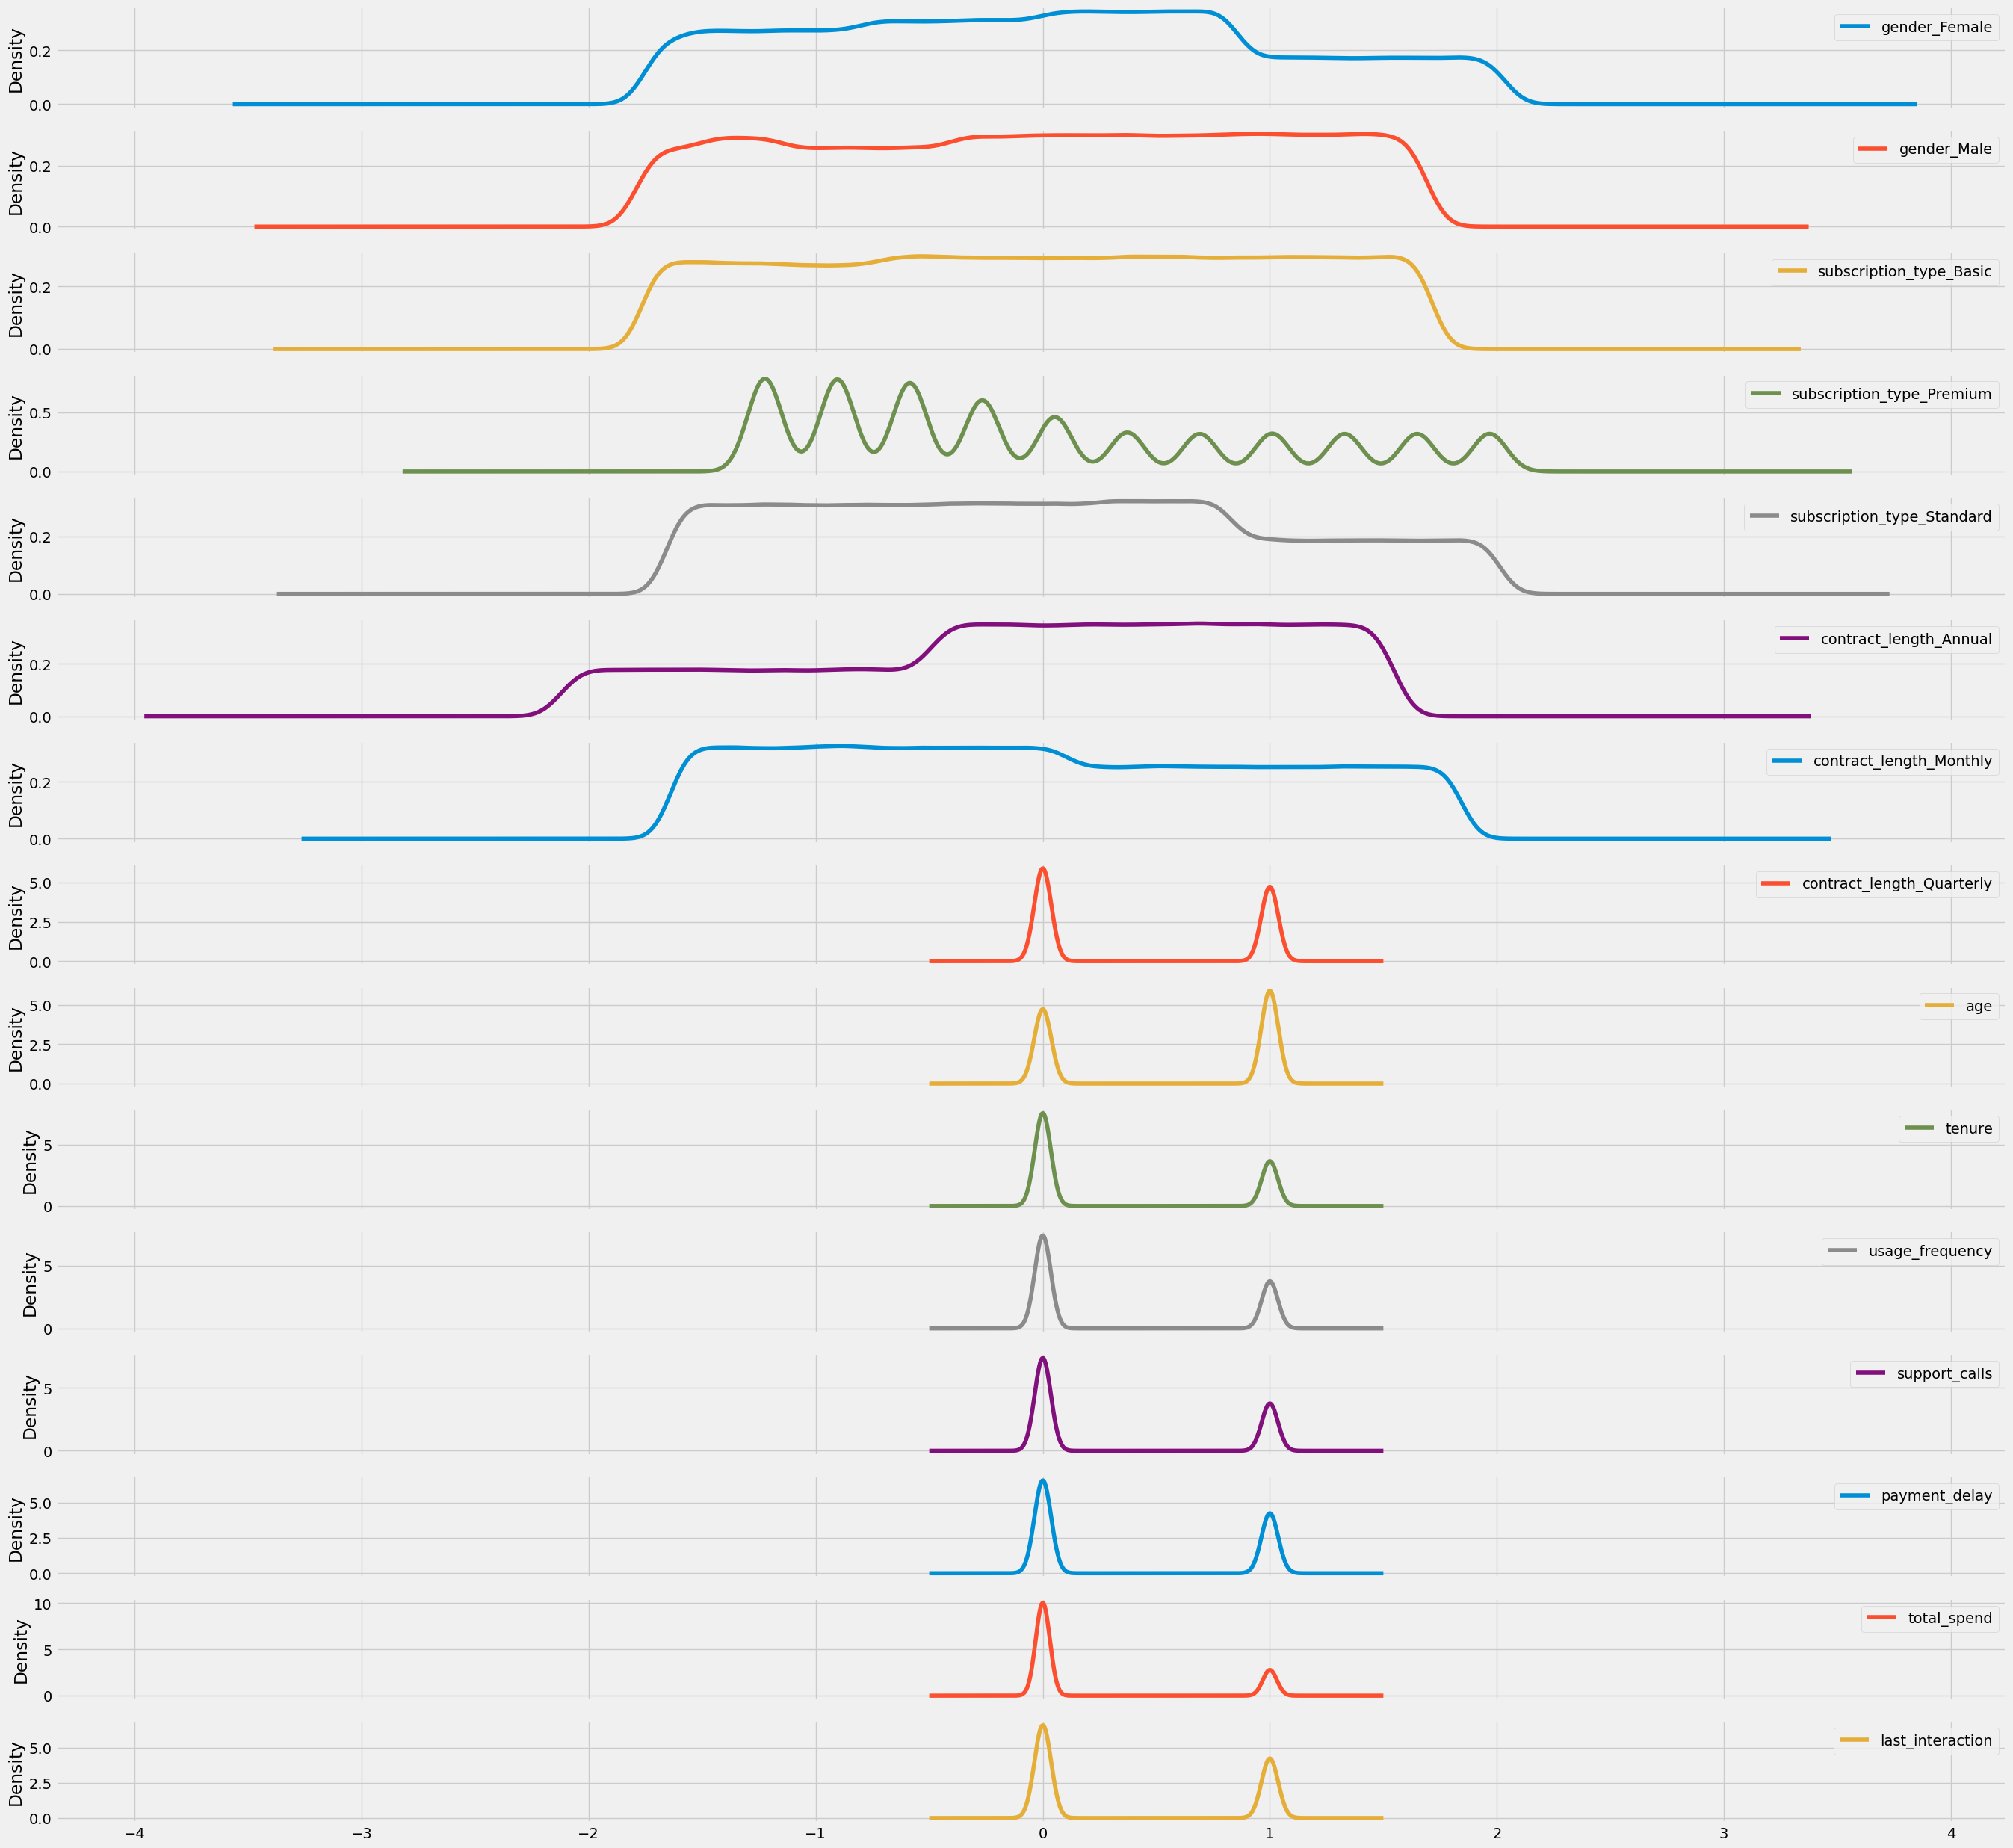

In [99]:
# KDE Plot to view the density (after scaling)

X_train_scaled.plot(kind = 'kde', subplots = True, figsize = (30, 30));
plt.savefig("images/KDE_X_train_scaled.png",bbox_inches = 'tight')
plt.show()

## Dummy Classifier (Baseline Model)

In [100]:
# Create a dummy classifier
dummy = DummyClassifier(strategy='most_frequent')

# Train the dummy classifier
dummy.fit(X_train, y_train)

# Get the baseline performance for the training set
y_pred_train = dummy.predict(X_train)
baseline_train = accuracy_score(y_train, y_pred_train)

# Get the baseline performance for the test set
y_pred_test = dummy.predict(X_test)
baseline_test = accuracy_score(y_test, y_pred_test)

print(f'Baseline accuracy for training set: {baseline_train * 100:.2f}%')
print(f'Baseline accuracy for test set: {baseline_test * 100:.2f}%')

Baseline accuracy for training set: 55.53%
Baseline accuracy for test set: 55.48%


## A Simple Model (to compare with Dummy Classifier)

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a Logistic Regression model and train the model
model_logreg = LogisticRegression()
model_logreg.fit(X_train_scaled, y_train)

# Predict on the training/test data
y_train_pred = model_logreg.predict(X_train_scaled)
y_test_pred = model_logreg.predict(X_test_scaled)

In [102]:
# Calculate the accuracy score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Training Accuracy: 84.93%
Test Accuracy: 84.60%


**Next steps**

In the next phase:

*   I'll have different models to compare
*   I'll use cross validation techniques and hydepertuning params to improve on those models
